<h1 style="font-size:5vw" align='center'><b>Will COVID-19 end in INDIA ??</b></h1>

[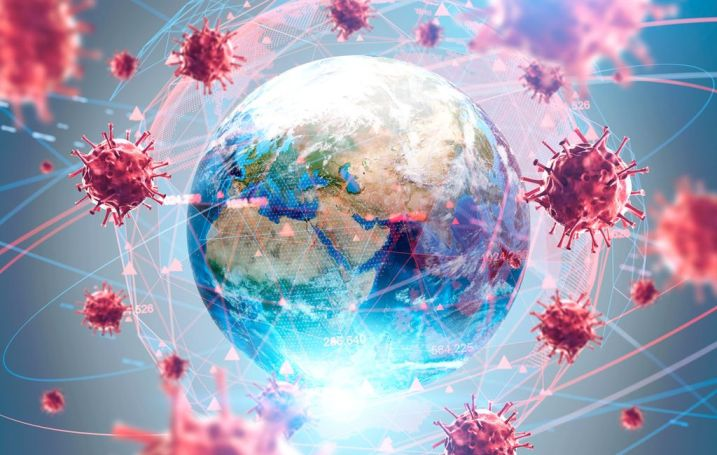]

<h3>Understanding the Coronaviruses</h3>

Coronaviruses are a group of related RNA viruses that cause diseases in mammals and birds. In humans, these viruses cause respiratory tract infections that can range from mild to lethal. Mild illnesses include some cases of the common cold (which is also caused by other viruses, predominantly rhinoviruses), while more lethal varieties can cause SARS, MERS, and COVID-19. Symptoms in other species vary: in chickens, they cause an upper respiratory tract disease, while in cows and pigs they cause diarrhea. For now, there are no vaccines or antiviral drugs to prevent or treat human coronavirus infections.

<a href="https://en.wikipedia.org/wiki/Coronavirus" target="_blank">Source of information</a>

<h3>Content:</h3>

1.&nbsp;&nbsp;[Import libraries/data files](#section_id1)<br>
2.&nbsp;&nbsp;[Global Death rate for Top countries](#section_id2)<br>
3.&nbsp;&nbsp;[Global Death rate in last 10 days](#section_id3)<br>
4.&nbsp;&nbsp;[Death trends per million population for India and Top 5 countries](#section_id5)<br>
5.&nbsp;&nbsp;[The spread of COVID-19 in the India](#section_id6)<br>
6.&nbsp;&nbsp;[Calculating Deaths per million](#section_id4)<br>
7.&nbsp;&nbsp;[India Lockdown/Unlock Impact](#section_id7)<br>
8.&nbsp;&nbsp;[Growth Rates per states](#section_id8)<br>
9.&nbsp;&nbsp;[Predicting Daily Cases](#section_id9)<br>
10.&nbsp;[Predicting Daily Confirmed Cases](#section_id10)<br>
11.&nbsp;[Prediction for next 1 year](#section_id11)<br>
12.&nbsp;[Data Sources](#section_id12)<br>

<a id='section_id1'><br><h2> Import libraries/data files</h2></a>

In [ ]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns
%matplotlib inline
import plotly.express as px
from datetime import date 
import datetime
import shapefile as shp
import geopandas as gpd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
import itertools

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


from wordcloud import WordCloud, ImageColorGenerator

import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
#confirmed, recovered and deceased cases till Apr 19th.  
cases_till_19Apr=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data1.csv')

#confirmed, recovered and deceased cases from April 20th till Apr 26th.  
cases_20Apr_to_26Apr=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data2.csv')

# confirmed, recovered and deceased cases from April 27th till May 9th  
cases_27Apr_to_9May=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data3.csv')

# confirmed, recovered and deceased cases from May 10th till May 23rd  
cases_10May_to_23May=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data4.csv')

# confirmed, recovered and deceased cases from May 24th till June 4th 
cases_24May_to_4June=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data5.csv')

#confirmed, recovered and deceased cases from April 20th till Apr 26th.  
cases_5June_to_19June=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data6.csv')

# confirmed, recovered and deceased cases from April 27th till May 9th  
cases_20June_to_30June=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data7.csv')

# confirmed, recovered and deceased cases from May 10th till May 23rd  
cases_1July_to_7July=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data8.csv')

# confirmed, recovered and deceased cases from May 24th till June 4th 
cases_8July_to_13July=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data9.csv')

# confirmed, recovered and deceased cases from May 10th till May 23rd  
cases_14July_to_17July=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data10.csv')

# confirmed, recovered and deceased cases from May 24th till June 4th 
cases_18July_to_22July=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data11.csv')

# confirmed, recovered and deceased cases from July 23rd onwards
cases_23July_onwards=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data12.csv')

#Frozen as of Apr 26th.  
death_and_recovered_till_26Apr=pd.read_csv('../input/covid-23-june/death_and_recovered_till_26Apr.csv')

#The current statewise situation  
state_wise=pd.read_csv('https://api.covid19india.org/csv/latest/state_wise.csv')

#Time series of Confirmed, Recovered and Deceased cases  
case_time_series=pd.read_csv('https://api.covid19india.org/csv/latest/case_time_series.csv')

#The current Districtwise numbers situation  
district_wise=pd.read_csv('https://api.covid19india.org/csv/latest/district_wise.csv')

#Statewise timeseries of Confirmed, Recovered and Deceased numbers.  
state_wise_daily=pd.read_csv('https://api.covid19india.org/csv/latest/state_wise_daily.csv')

#Number of tests conducted by the state, ventilators and hospital bed information reported in state bulletins  
statewise_tested_numbers_data=pd.read_csv('https://api.covid19india.org/csv/latest/statewise_tested_numbers_data.csv')

#Number of tests reported by ICMR  
tested_numbers_icmr_data=pd.read_csv('https://api.covid19india.org/csv/latest/tested_numbers_icmr_data.csv')

#List of sources. Some links mentioned could break as states change their reporting location  
sources_list=pd.read_csv('https://api.covid19india.org/csv/latest/sources_list.csv')

#Travel history of patients,. It is static data and not updated anymore.  
travel_history=pd.read_csv('https://api.covid19india.org/csv/latest/travel_history.csv')

#Global Deaths
global_deaths = pd.read_csv('../input/covid-23-june/global_deaths .csv')

#World Population
World_population = pd.read_csv('../input/covid-23-june/population_by_country_2020.csv')

<p style="font-size:14px; color:blue">After analyzing the data, the data available in death_and_recovered_till_26Apr dataframe is incomplete and complete data till data can be obtained from cases dataset using current status column.</p>

In [ ]:
#Removing non relevant columns and to make the datasets consistent

cases_till_19Apr.drop(['Patient Number','Backup Notes', 'Estimated Onset Date'], axis=1, inplace=True)
cases_20Apr_to_26Apr.drop(['Patient Number','Backup Notes', 'Estimated Onset Date'], axis=1, inplace=True)
cases_27Apr_to_9May.drop(['Entry_ID', 'Patient Number'], axis=1, inplace=True)
cases_10May_to_23May.drop(['Entry_ID','Patient Number'], axis=1, inplace=True)
cases_24May_to_4June.drop(['Entry_ID','Patient Number'], axis=1, inplace=True)
cases_5June_to_19June.drop(['Entry_ID','Patient Number'], axis=1, inplace=True)
cases_20June_to_30June.drop(['Entry_ID','Patient Number'], axis=1, inplace=True)
cases_1July_to_7July.drop(['Entry_ID','Patient Number'], axis=1, inplace=True)
cases_8July_to_13July.drop(['Entry_ID','Patient Number'], axis=1, inplace=True)
cases_14July_to_17July.drop(['Entry_ID','Patient Number'], axis=1, inplace=True)
cases_18July_to_22July.drop(['Entry_ID','Patient Number'], axis=1, inplace=True)
cases_23July_onwards.drop(['Entry_ID','Patient Number'], axis=1, inplace=True)

state_wise.drop(['State_Notes'], axis=1, inplace=True)
district_wise.drop(['SlNo','District_Notes','Last_Updated'], axis=1, inplace=True)
travel_history.drop([' ','lat_long','Accuracy_Location','Type'], axis=1, inplace=True)

In [ ]:
#Renaming columns to match the datasets for merge
cases_till_19Apr.rename(columns={'Num cases': 'Num Cases'}, inplace=True)
cases_20Apr_to_26Apr.rename(columns={'Num cases': 'Num Cases'}, inplace=True)


#Reordering column to match data for total cases reported.
cases_till_19Apr=cases_till_19Apr[['State Patient Number',
'Date Announced',
'Age Bracket',
'Gender',
'Detected City',
'Detected District',
'Detected State',
'State code',
'Num Cases',
'Current Status',
'Contracted from which Patient (Suspected)',
'Notes',
'Source_1',
'Source_2',
'Source_3',
'Nationality',
'Type of transmission',
'Status Change Date'
]]

cases_20Apr_to_26Apr=cases_20Apr_to_26Apr[['State Patient Number',
'Date Announced',
'Age Bracket',
'Gender',
'Detected City',
'Detected District',
'Detected State',
'State code',
'Num Cases',
'Current Status',
'Contracted from which Patient (Suspected)',
'Notes',
'Source_1',
'Source_2',
'Source_3',
'Nationality',
'Type of transmission',
'Status Change Date'
]]

In [ ]:
total_cases=pd.concat([cases_till_19Apr,
cases_20Apr_to_26Apr,
cases_27Apr_to_9May,
cases_10May_to_23May,
cases_24May_to_4June,
cases_5June_to_19June,
cases_20June_to_30June,
cases_1July_to_7July,
cases_8July_to_13July,
cases_14July_to_17July,
cases_18July_to_22July,
cases_23July_onwards])
total_cases.info()
#Selecting columns with more than 70% data in the column.

total_cases=total_cases[['State Patient Number','Date Announced','Detected District','Detected State','State code','Current Status','Num Cases', 'Source_1','Source_2','Source_3']]
total_cases.head(5)

<a id='section_id2'><br><h2>Global Death rate for Top 5 countries and India.</h2></a>

<p style="font-size:14px; color:blue"> We will try to understand the position of the India in global number of deaths.
    In this analysis, We will consider the top 5 countries who have faced the maximum number of deaths.
    <br><br>
    This list fetches the real time numbers as per the code run time. </p> 

In [ ]:
global_deaths.rename(columns={global_deaths.columns[-1]: 'Today'}, inplace=True)
global_deaths_orginal=global_deaths
global_deaths.drop(['Province/State','Lat','Long'], axis=1,inplace=True)
global_deaths=pd.concat([global_deaths.iloc[1:,:].nlargest(5, 'Today'),global_deaths[global_deaths['Country/Region']=='India']])
global_deaths

In [ ]:
global_deaths=global_deaths.transpose()
global_deaths.reset_index(level=0, inplace=True)
global_deaths.columns = global_deaths.iloc[0]
global_deaths.drop(global_deaths.index[0], inplace=True)
global_deaths.rename(columns={global_deaths.columns[0]: 'Date'}, inplace=True)
global_deaths.head()

<p style="font-size:14px">Below graph demonstrate that the <b>number of deaths in India</b> are less as 
compared to top 6 countries in the world.<br><br>
However, there are 2 major observations for India:<br>
    1. The number of deaths are increasing is at fast pace in last 20 days.<br>
    2. The graph curve is no more near to flattening like France and Italy.</p>

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(global_deaths.index,global_deaths['US'], label = 'US')
plt.plot(global_deaths.index,global_deaths['United Kingdom'], label = 'United Kingdom')
plt.plot(global_deaths.index,global_deaths['Italy'], label = 'Italy')
plt.plot(global_deaths.index,global_deaths['France'], label = 'France')
plt.plot(global_deaths.index,global_deaths['Brazil'], label = 'Brazil')
plt.plot(global_deaths.index,global_deaths['India'], label = 'India')
plt.title('Number of Coronavirus Deaths')
plt.xlabel('Days')
plt.ylabel('Number of deaths')
plt.legend()
plt.grid(zorder = 0)
plt.show()

<a id='section_id3'><br><h2>Understanding the Global Death rate in last 10 days.</h2></a>

<p style="font-size:14px; color:blue"> The above graph has shown us the trend for the last 140 days. <br><br>
    The number of cases and deaths can be related to the population of the country and hence, as next part of analysis, we will try to understand the death trend as per population of the countries.<br>
    We will also try to analyze the graph movement for the last 10 days to detrmine the speed of the pandemic. 

In [ ]:
#Global Deaths
global_deaths_current=global_deaths_orginal.iloc[:,[-10,-9,-8,-7,-6,-5,-4,-3,-2,-1]].groupby(global_deaths_orginal['Country/Region']).sum()
global_deaths_current.reset_index(level=0, inplace=True)
global_deaths_current.columns=['Country','Day 1','Day 2','Day 3','Day 4','Day 5','Day 6','Day 7','Day 8','Day 9','Day 10']

In [ ]:
global_deaths_current.sort_values(['Day 10'],ascending=False, inplace=True)
global_deaths_current.head()

In [ ]:

World_Population=World_population[['Country (or dependency)','Population (2020)']]
World_Population.columns=['Country','Population(in millions)']
World_Population['Population(in millions)']=World_Population['Population(in millions)']/1000000

In [ ]:
global_deaths_current.replace('US','United States', inplace=True)
global_deaths_current=pd.merge(global_deaths_current, World_Population, on='Country', how='inner')
global_deaths_current.head()

In [ ]:
global_deaths_current_per_million=global_deaths_current
global_deaths_current_per_million['Day 1']=round((global_deaths_current_per_million['Day 1']/global_deaths_current_per_million['Population(in millions)']),2)
global_deaths_current_per_million['Day 2']=round((global_deaths_current_per_million['Day 2']/global_deaths_current_per_million['Population(in millions)']),2)
global_deaths_current_per_million['Day 3']=round((global_deaths_current_per_million['Day 3']/global_deaths_current_per_million['Population(in millions)']),2)
global_deaths_current_per_million['Day 4']=round((global_deaths_current_per_million['Day 4']/global_deaths_current_per_million['Population(in millions)']),2)
global_deaths_current_per_million['Day 5']=round((global_deaths_current_per_million['Day 5']/global_deaths_current_per_million['Population(in millions)']),2)
global_deaths_current_per_million['Day 6']=round((global_deaths_current_per_million['Day 6']/global_deaths_current_per_million['Population(in millions)']),2)
global_deaths_current_per_million['Day 7']=round((global_deaths_current_per_million['Day 7']/global_deaths_current_per_million['Population(in millions)']),2)
global_deaths_current_per_million['Day 8']=round((global_deaths_current_per_million['Day 8']/global_deaths_current_per_million['Population(in millions)']),2)
global_deaths_current_per_million['Day 9']=round((global_deaths_current_per_million['Day 9']/global_deaths_current_per_million['Population(in millions)']),2)
global_deaths_current_per_million['Day 10']=round((global_deaths_current_per_million['Day 10']/global_deaths_current_per_million['Population(in millions)']),2)
global_deaths_current_per_million.drop(['Population(in millions)'], axis=1, inplace=True)

In [ ]:
global_deaths_current_per_million=global_deaths_current_per_million.head(10)

<p style="font-size:14px; color:blue"> In order to enhance readability and avoid confusion, I have plotted 3 days death count for the countries relative to their population.<br><br></p>
    <p style="font-size:14px; color:blue"> The observations for India are:<br><p style="font-size:14px; color:blue"> 
        1. The rate of increase in deaths is less as compared to other countries.<br>
        2. The number of deaths per 5 days seems to be constant or less variant.</p>

In [ ]:
#update labels

plt.figure(figsize=(8,8))
plt.scatter(global_deaths_current_per_million['Day 1'],global_deaths_current_per_million['Country'], label = 'Day 1')
plt.scatter(global_deaths_current_per_million['Day 6'],global_deaths_current_per_million['Country'], label = 'Day 6')
plt.scatter(global_deaths_current_per_million['Day 10'],global_deaths_current_per_million['Country'], label = 'Today')
plt.legend()
plt.title("Death Rate per Million in Hotspot Countries");
plt.xlabel('Death Rate per Million');

<a id='section_id5'><br><h2>Understanding the death trends per million population for India and Top 5 countries</h2></a>

In [ ]:

global_deaths_current_per_million=global_deaths_current_per_million.transpose()
global_deaths_current_per_million.reset_index(level=0, inplace=True)
global_deaths_current_per_million.columns = global_deaths_current_per_million.iloc[0]
global_deaths_current_per_million.drop(global_deaths_current_per_million.index[0], inplace=True)
global_deaths_current_per_million.head()


<p style="font-size:14px; color:blue">Below graph is to showcase the trend in the last 10 days:<br><br>
    &emsp; For India, the number of deaths per day for last 10 days looks constant. However, this needs deeper analysis, because in this graph we are comparing the numbers againest countries with very high numbers. So, the curve can be constant or with a constant increase.<br><br>
    &emsp; I have also tried to generate this graph with normalized numbers for relative study. However, normalized graph is also not enough to conclude any observations for the country.</p>
    

In [ ]:
plt.figure(figsize=(8,8))
plt.plot('Country', 'United States',linewidth = 3,data=global_deaths_current_per_million)
plt.plot('Country', 'United Kingdom',data=global_deaths_current_per_million)
plt.plot('Country', 'Italy',data=global_deaths_current_per_million)
plt.plot('Country', 'France',data=global_deaths_current_per_million)
plt.plot('Country', 'Spain',data=global_deaths_current_per_million)
plt.plot('Country', 'India',data=global_deaths_current_per_million)
plt.xlabel('Dates')
plt.ylabel('Total Cases')
plt.title("Cases Trend")
plt.xticks(rotation=90)
plt.legend(loc='lower right', bbox_to_anchor=(1.3,0.7))

<a id='section_id6'><br><h2>Understanding the spread of COVID-19 in the country</h2></a>

<p style="font-size:14px; color:blue"> We will first try to understand the trend which we couldn't understand in the previous graph due to incomparable range of data.<br>
    In this graph, I have plotted the trend graph, for the last 140 days (22nd January onwards). This indicates how the confirmed, recovered and deceased cases have grown up in last few months.</p>

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(case_time_series.index,'Total Confirmed',data=case_time_series)
plt.plot(case_time_series.index,'Total Recovered',data=case_time_series)
plt.plot(case_time_series.index,'Total Deceased',data=case_time_series)
plt.xlabel('Since 22 January')
plt.ylabel('Number of Cases')
plt.title("Total Cases Trend")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
#opening the shape file
shp_path = '../input/ind-adm/IND_adm1.shp'

#reading the shape file by using reader function of the shape lib
map_df = gpd.read_file(shp_path)

map_df.head()
#map_df.plot()

In [ ]:
state_wise.reset_index(level=0, inplace=True)
state_wise1=state_wise[['State','Confirmed','Active']]
state_wise1=state_wise.loc[1:,:]
state_wise.loc[state_wise['State'] == 'Odisha', ['State']] = 'Orissa'
state_wise1.sort_values(by=['State'], inplace=True)
merged=pd.merge(map_df, state_wise1, left_on='NAME_1', right_on='State')

<p style="font-size:14px; color:blue">The legend indicates darker the color, the more number of active cases in the states.<br>
    &emsp; I have plotted the number of active cases on the graph instead of confirmed cases to eliminate the recovered factor from the analysis. This also eliminates the state to be in darker color which have better recovery rates.<br><br>
    &emsp; As it is clearly visible:<br>
    &emsp; <b>Worst affected States </b>are:<br>
    &emsp;&emsp;1.&nbsp; Maharastra<br>
    &emsp;&emsp;2.&nbsp; Delhi<br>
    &emsp;&emsp;3.&nbsp; Tamil Nadu<br>
    &emsp; <b>Medium affected States</b> are:<br>
    &emsp;&emsp;1.&nbsp; Gujarat<br>
    &emsp;&emsp;2.&nbsp; Uttar Pradesh<br>
    &emsp;&emsp;3.&nbsp; West Bengal<br>
</p>

In [ ]:
merged = merged[merged['Active'].notna()]
# set a variable that will call whatever column we want to visualise on the map
variable = merged['Active']
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
#fig, ax = plt.subplots(1, figsize=(10, 6))

ax=merged.plot(column=variable, cmap='gist_heat_r', linewidth=0.8, edgecolor='0.8', figsize=(10,10), legend=True)
ax.axis('off')

# add a title
ax.set_title('Active cases in India', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: https://api.covid19india.org',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='bottom', fontsize=12, color='#555555')

In [ ]:
case_time_series.head(1)

In [ ]:
case_time_series['Date']=case_time_series['Date'] + " 2020"
case_time_series['Date']=pd.to_datetime(case_time_series['Date'], format='%d %B %Y')
cases_last_10_days=case_time_series[case_time_series['Date'] >= (pd.to_datetime(date.today()) - pd.Timedelta(days=10))]

<p style="font-size:14px; color:blue"> Till now, we have analyzed the the rate of growth for active cases is almost constant over the last few months. Now, it's time to understand the trend in last 10 days. <br>As this pandemic spreads really fast, the strategies to control it should be reviewed every few days by analyzing the trend.<br><br></p>
    
<p style="font-size:14px; color:blue">
We can notice few deviations in the graph. This can be due to 2 factors:<br>
&emsp;1.&nbsp;The increase is not constant. <br>
&emsp; &emsp; OR<br>
&emsp;2.&nbsp;The manual entries into the system are not real time and delayed;sometimes even by few days. Eg: Multiple states added major pending death counts on 
    &emsp; &nbsp; &nbsp; 16th of June.</p>

In [ ]:
plt.figure(figsize=(8,8))
plt.plot('Date','Daily Confirmed',data=cases_last_10_days)
plt.plot('Date','Daily Recovered',data=cases_last_10_days)
plt.plot('Date','Daily Deceased',data=cases_last_10_days)
plt.xlabel('Dates')
plt.ylabel('Number of Cases')
plt.title("Daily Cases Trend")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
state_wise.sort_values(by=['Confirmed'], inplace=True, ascending=False)
state_wise.drop(state_wise[state_wise['State'] == 'State Unassigned'].index, inplace=True)
state_wise.head()

In [ ]:
state_wise_pie=state_wise[['State','Confirmed','Recovered','Deaths','Active']].head(1)
state_wise_pie=state_wise_pie.transpose()
state_wise_pie.reset_index(inplace = True) 
state_wise_pie=state_wise_pie.loc[2:,:]
state_wise_pie.columns=['State of Patient','Number of Cases']

In [ ]:
state_wise_pie

<a id='section_id4'><br><h2>Current State of Patient</h2></a>

In [ ]:
fig = px.pie(state_wise_pie,
             values='Number of Cases',
             names="State of Patient",
             title="Coronavirus Cases",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

<p style="font-size:14px; color:blue">Per the previous graph, there are considerable number of Active cases in the country. Hence, with this heat map, we will try to understand the cases as per various category.<br><br></p>
    
<p style="font-size:14px; color:blue">
This graph can be used for following analysis:<br>
    &emsp;1. Number of cases in each state of patients.<br>
    &emsp;2. Recovery rates in Top states. Eg: The recovered rate is high in Gujarat.<br>
    &emsp;3. Deceased rates in Top states. Eg: The deceased rate is high in Gujarat.</p>

In [ ]:
state_wise=state_wise.set_index('State')
plt.figure(figsize=(15,8))
sns.heatmap(state_wise.iloc[1:11,1:5], annot=True, linewidths=2, fmt='g')

In [ ]:
#Number of tests reported by ICMR  
tested_numbers_icmr_data=pd.read_csv('https://api.covid19india.org/csv/latest/tested_numbers_icmr_data.csv')
tested_numbers_icmr_data=tested_numbers_icmr_data.dropna(subset=['Total Samples Tested'])

new = tested_numbers_icmr_data["Update Time Stamp"].str.split(" ", n = 1, expand = True) 
tested_numbers_icmr_data['Date']=new[0]
tested_numbers_icmr_data.drop("Update Time Stamp", axis=1, inplace=True)
tested_numbers_icmr_data['Date']= pd.to_datetime(tested_numbers_icmr_data['Date']) 
tested_numbers_icmr_data['Date'] = tested_numbers_icmr_data['Date'].dt.strftime('%d-%m-%Y')

In [ ]:
tested_numbers_icmr_data_graph=tested_numbers_icmr_data.groupby('Date').sum()
tested_numbers_icmr_data_graph.reset_index(level=0, inplace=True)
tested_numbers_icmr_data_graph['Date']= pd.to_datetime(tested_numbers_icmr_data_graph['Date']) 
tested_numbers_icmr_data_graph.sort_values(by=['Date'], inplace=True)
tested_numbers_icmr_data_graph=tested_numbers_icmr_data_graph.tail(20)
tested_numbers_icmr_data_graph.head()

<p style="font-size:14px; color:blue"> As per the studies, it is evident that the coronavirus virus can be controlled by 2 ways:<br>
    &emsp;1.&nbsp;More Testing<br>
    &emsp;2.&nbsp;Social Distancing<br><br>
First, we will analyze the testing which is going on in the country based on Indian Council of Medical Research(ICMR) data.<br><br>
The graph shows the numbers in millions. There is a steady increase in the number of testing on daily basis. These numbers are an aggregate overview of the increament. We need to analyze this data at more granual level i.e at state level.  </p>
    

In [ ]:
fig=px.bar(tested_numbers_icmr_data_graph, y='Total Samples Tested', x='Date')    
fig.update_layout(title_text='Total Testing(per ICMR Data)', title_x=0.5, font=dict(
        family="Classic",
        size=18,
        color="#7f7f7f"))
fig.show()

In [ ]:
statewise_tested_numbers_data1=pd.DataFrame(statewise_tested_numbers_data['Total Tested'].groupby(statewise_tested_numbers_data['State']).sum())
statewise_tested_numbers_data1.reset_index(level=0, inplace=True)
statewise_tested_numbers_data1.sort_values(by=['Total Tested'], inplace=True, ascending=False)

<p style="font-size:14px; color:blue">The graph is based on the total testings being done till date.<br><br>
As per the shown numbers the top 2 states in terms of testing which are also in top slots for the number of cases are:<br>
    &emsp;1. &nbsp;Maharashtra<br>
    &emsp;2. &nbsp;Tamil Nadu<br></p>
<p style="font-size:14px; color:blue">
These numbers are also dependent on the size of the population and hence should be analyzed with that factor in mind.<br>
Eg: 1. Delhi has small size and population as compared to Maharastra and hence direct comparison of numbers should not be the only criteria.<br>
    2. Uttar Pradesh is a bigger state and population. The testing percentage looks pretty less when compared with other similar size states.</p>

In [ ]:
plt.figure(figsize=(8,8))
#my_colors = ['#66b3ff','green','red']
statewise_tested_numbers_data['Total Tested'].groupby(statewise_tested_numbers_data.State).sum()
plt.pie('Total Tested',labels= 'State', autopct='%1.1f%%'#,colors=my_colors
        ,data=statewise_tested_numbers_data1.head(15))
plt.axis('equal')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage of testing in top 15 States\n', size=20)
plt.show()

<a id='section_id7'><br><h2>India Lockdown/Unlock Impact</h2></a>

<p style="font-size:14px; color:blue">Phase 1: 25 March 2020 – 14 April 2020 (21 days) <br>Phase 2: 15 April 2020 – 3 May 2020 (19 days) <br>Phase 3: 4 May 2020 – 17 May 2020 (14 days) <br>Phase 4: 18 May 2020 – 31 May 2020 (14 days)<br>Unlock 1: 1 June 2020 - ongoing</p>

In [ ]:
case_time_series['Daily Growth factor']=0.0
case_time_series['Daily Growth factor']=case_time_series['Daily Growth factor'].astype(float)
for i in range(len(case_time_series)-1):
    if(case_time_series.at[i,'Daily Confirmed']!=0):
        case_time_series.at[i+1,'Daily Growth factor']=np.nan_to_num(case_time_series.at[i+1,'Daily Confirmed']/case_time_series.at[i,'Daily Confirmed'])
    else:
        case_time_series.at[i+1,'Daily Growth factor']=0.0

case_time_series.at[len(case_time_series)-1,'Daily Growth factor']=1.0

In [ ]:
First_lock_down = case_time_series.loc[(case_time_series['Date']>'2020-03-24') & (case_time_series['Date']<'2020-04-15')]
Second_lock_down = case_time_series.loc[(case_time_series['Date']>'2020-04-14') & (case_time_series['Date']<'2020-05-04')]
Third_lock_down = case_time_series.loc[(case_time_series['Date']>'2020-05-03') & (case_time_series['Date']<'2020-05-18')]
Fourth_lock_down = case_time_series.loc[(case_time_series['Date']>'2020-05-17') & (case_time_series['Date']<'2020-06-01')]
First_unlock = case_time_series.loc[(case_time_series['Date']>'2020-05-31')]

In [ ]:
First_lock_down_gf=round(sum(First_lock_down['Daily Growth factor'])/len(First_lock_down),2)
Second_lock_down_gf = round(sum(Second_lock_down['Daily Growth factor'])/len(Second_lock_down),2)
Third_lock_down_gf = round(sum(Third_lock_down['Daily Growth factor'])/len(Third_lock_down),2)
Fourth_lock_down_gf = round(sum(Fourth_lock_down['Daily Growth factor'])/len(Fourth_lock_down),2)
First_unlock_gf = round(sum(First_unlock['Daily Growth factor'])/len(First_unlock),2)

In [ ]:
Growth=pd.DataFrame(columns=['Lockdown_num','Growth Factor'])
Growth['Growth Factor']=Growth['Growth Factor'].astype('float')

Growth.loc[0,:]=['First lock down',First_lock_down_gf]
Growth.loc[1,:]=['Second lock down',Second_lock_down_gf]
Growth.loc[2,:]=['Third lock down',Third_lock_down_gf]
Growth.loc[3,:]=['Fourth lock down',Fourth_lock_down_gf]
Growth.loc[4,:]=['First unlock',First_unlock_gf]

<p style="font-size:14px; color:blue">We have discussed the testing trend and how it is an important factor. Now we will analyze the second most important cure for this pandemic iz. SOCIAL DISTANCING. <br></p>

<p style="font-size:14px; color:blue">
    The country with the second largest population in the World can only implement social distancing by LOCKDOWN. As we have practically experienced, that even when the first lockdown was difficult for people to mend their habits and take a hit in their business, people learnt overtime. However,with the latest unlock, the growth is increasing.<br></p>
 
<p style="font-size:14px; color:blue">
    These numbers might looks small but just multiple it with atleast 10000 and you will understand the impact. As we have moved into Unlock 1, the numbers are growing at the pace of 0.96 daily.<br></p>
    
<p style="font-size:14px; color:blue">    
    Also, point to be noted is it is not only a difference of 0.13(lockdown1) and 0.08(Unlock1), it makes a bigger impact when it is multiplied with the previous day count. <br>
eg: During lockdown 1, 0.13*4000(average increase)=520 cases per day but in unlock 1, 0.08*12000(average increase)=960<br>
As it is evident that even after the lower growth rate, this rate is more dangerous because it is adding more number of cases. Also, the growth factor is increasing day by day.<br>

<p style="font-size:14px; color:blue">
Now, it is very important to control the growth rate. The overall rate can only be controlled if the state level rates are controlled.</p>

In [ ]:
fig = px.line(Growth, x="Lockdown_num", y="Growth Factor",title='Growth Factor from 14th March onwards',
              labels=dict(Lockdown_num="Lockdown Number"), template="plotly_dark")
fig.show()

<a id='section_id8'><br><h2>Growth Rates per states</h2></a>

In [ ]:
state_wise_daily.drop(['TT','DD','TT','UN'],axis=1, inplace=True)
state_wise_daily.columns=['Date','Status','Andaman and Nicobar Islands',
'Andhra Pradesh',
'Arunachal Pradesh',
'Assam',
'Bihar',
'Chandigarh',
'Chhattisgarh',
'Dadra and Nagar Haveli and Daman and Diu',
'Delhi',
'Goa',
'Gujarat',
'Haryana',
'Himachal Pradesh',
'Jammu and Kashmir',
'Jharkhand',
'Karnataka',
'Kerala',
'Ladakh',
'Lakshadweep',
'Madhya Pradesh',
'Maharashtra',
'Manipur',
'Meghalaya',
'Mizoram',
'Nagaland',
'Odisha',
'Puducherry',
'Punjab',
'Rajasthan',
'Sikkim',
'Tamil Nadu',
'Telangana',
'Tripura',
'Uttar Pradesh',
'Uttarakhand',
'West Bengal'
]

In [ ]:
state_wise_daily_latest=state_wise_daily[state_wise_daily['Status']=='Confirmed'].tail(1).transpose().iloc[2:,:]
state_wise_daily_latest.columns=['Total']
#state_wise_daily_latest=state_wise_daily_latest.sort_values(by='Total', inplace=True, ascending=False)

state_wise_daily_latest=state_wise_daily_latest.sort_values(by='Total', ascending=False).head(6)
state_wise_daily_latest

In [ ]:
col=state_wise_daily_latest.index[:]
col=col.insert(6, 'Date') 
state_wise_daily[state_wise_daily['Status']=='Confirmed'][col]

In [ ]:
state_wise_daily_growth=state_wise_daily[state_wise_daily['Status']=='Confirmed'][col]
state_wise_daily_growth.reset_index(inplace=True)
state_wise_daily_growth.drop(['index'],axis=1,inplace=True)

In [ ]:
state_wise_daily_growth[col[0]+'_gf']=0.0
state_wise_daily_growth[col[1]+'_gf']=0.0
state_wise_daily_growth[col[2]+'_gf']=0.0
state_wise_daily_growth[col[3]+'_gf']=0.0
state_wise_daily_growth[col[4]+'_gf']=0.0
state_wise_daily_growth[col[5]+'_gf']=0.0

In [ ]:
for i in range(1,len(state_wise_daily_growth)):
    state_wise_daily_growth.at[i,col[0]+'_gf']=(state_wise_daily_growth.at[i,col[0]]/state_wise_daily_growth.at[i-1,col[0]])
    state_wise_daily_growth.at[i,col[1]+'_gf']=(state_wise_daily_growth.at[i,col[1]]/state_wise_daily_growth.at[i-1,col[1]])
    state_wise_daily_growth.at[i,col[2]+'_gf']=(state_wise_daily_growth.at[i,col[2]]/state_wise_daily_growth.at[i-1,col[2]])
    state_wise_daily_growth.at[i,col[3]+'_gf']=(state_wise_daily_growth.at[i,col[3]]/state_wise_daily_growth.at[i-1,col[3]])
    state_wise_daily_growth.at[i,col[4]+'_gf']=(state_wise_daily_growth.at[i,col[4]]/state_wise_daily_growth.at[i-1,col[4]])
    state_wise_daily_growth.at[i,col[5]+'_gf']=(state_wise_daily_growth.at[i,col[5]]/state_wise_daily_growth.at[i-1,col[5]])

In [ ]:
state_wise_daily_growth.replace(np.nan,0.00, inplace=True)
state_wise_daily_growth.replace(np.inf,0.00, inplace=True)
state_wise_daily_growth=state_wise_daily_growth.tail(45)
state_wise_daily_growth.round(2)
state_wise_daily_growth.head(1)

<p style="font-size:14px; color:blue">This graph is plotted for the Top 6 states in terms of cases growth rate in India. These are also the states which contributes the maximum daily case count. Therefore, if we can control the rate of cases growth in each state, we can control the overall pandemic.</p>

In [ ]:
fig = make_subplots(rows=2, cols=3,subplot_titles=(state_wise_daily_growth.columns[0],state_wise_daily_growth.columns[1],
                                                   state_wise_daily_growth.columns[2],state_wise_daily_growth.columns[3],
                                                   state_wise_daily_growth.columns[4],state_wise_daily_growth.columns[5]),
                   )
fig.append_trace(go.Scatter(x=state_wise_daily_growth["Date"], y=state_wise_daily_growth[col[0]+'_gf'], fill='tozeroy'),row=1, col=1)
fig.append_trace(go.Scatter(x=state_wise_daily_growth["Date"], y=state_wise_daily_growth[col[1]+'_gf'], fill='tozeroy'),row=1, col=2)
fig.append_trace(go.Scatter(x=state_wise_daily_growth["Date"], y=state_wise_daily_growth[col[2]+'_gf'], fill='tozeroy'),row=1, col=3)
fig.append_trace(go.Scatter(x=state_wise_daily_growth["Date"], y=state_wise_daily_growth[col[3]+'_gf'], fill='tozeroy'),row=2, col=1)
fig.append_trace(go.Scatter(x=state_wise_daily_growth["Date"], y=state_wise_daily_growth[col[4]+'_gf'], fill='tozeroy'),row=2, col=2)
fig.append_trace(go.Scatter(x=state_wise_daily_growth["Date"], y=state_wise_daily_growth[col[5]+'_gf'], fill='tozeroy'),row=2, col=3)

fig.update_layout(height=700, width=980,
                  title_text="Daily Growth for top 6 States(last 45 Days)",font=dict(
        family="Serif",
        size=18,
        color="#7f7f7f"))
fig.update_layout(showlegend=False)
fig.show()

<a id='section_id9'><br><h2>Predicting Daily Cases based on the existing trend.</h2></a>

<h4> This prediction is based on the ARIMA model. </h4>
<p style="font-size:14px; color:blue"> ARIMA(Auto Regressive Integrated Moving Average) is a class of models that 'explains' a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values

In [ ]:
case_time_series['Total Recovered/Deceased']=case_time_series['Total Recovered']+case_time_series['Total Deceased']
data=case_time_series[['Date','Daily Confirmed','Total Confirmed','Total Recovered/Deceased']]
#confirm_cs = pd.DataFrame(data).cumsum()
arima_data = data.reset_index()
arima_data.columns = ['index','Date','Daily Confirmed','Total Confirmed','Total Recovered/Deceased']

In [ ]:
model = ARIMA(arima_data['Daily Confirmed'].values, order=(4,1,0))
fit_model = model.fit(trend='c', full_output=True, disp=True)
forecast=fit_model.forecast(steps=60)
pred = list(forecast[0])
#fit_model.summary()

In [ ]:
start_date = case_time_series['Date'].max()
prediction_dates = []
for i in range(60):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
plt.figure(figsize= (15,10))
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Daily cases',fontsize = 20)
plt.title("Predicted Values for the next 60 Days" , fontsize = 20)
plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = '#ff9999',label = 'Predicted Daily Cases');
plt.plot_date(y='Daily Confirmed',x='Date',linestyle = '-',color = 'blue',label = 'Actual Daily Cases', data=case_time_series.tail(30));
plt.legend();

In [ ]:
model = ARIMA(arima_data['Total Confirmed'].values, order=(4,2,0))
fit_model = model.fit(trend='c', full_output=True, disp=True)
forecast=fit_model.forecast(steps=60)
pred = list(forecast[0])

#fit_model.summary()

<a id='section_id10'><br><h2>Predicting Daily Confirmed Cases based on the existing trend.</h2></a>

In [ ]:
start_date = case_time_series['Date'].max()
prediction_dates = []
for i in range(60):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
plt.figure(figsize= (15,10))
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total Confirmed Cases',fontsize = 20)
plt.title("Predicted Values for the next 60 Days" , fontsize = 20)
plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = '#ff9999',label = 'Predicted Confirmed Cases');
plt.plot_date(y='Total Confirmed',x='Date',linestyle = '-',color = 'blue',label = 'Actual Confirmed Cases', data=case_time_series.tail(30));
plt.legend();

In [ ]:
forecast=fit_model.forecast(steps=280)
pred = list(forecast[0])

In [ ]:
model = ARIMA(arima_data['Total Recovered/Deceased'].values, order=(7,2,1))
fit_model = model.fit(trend='c', full_output=True, disp=True)
forecast=fit_model.forecast(steps=280)
pred1 = list(forecast[0])

fit_model.summary()

<h4> Predicting the daily cases/ confirmed cases only indicates the increment rate. However this will not help us to stop the pandemic. <br><br> There are 3 solutions to this pandemic:<br><br>
    &emsp;1.&nbsp;Vaccination. - Many countries are working on it. However, we do not have any expected timeline for it.<br><br>
    &emsp;2.&nbsp;Adjusting to new normal of social distancing, masks, sanitizer etc. -People are adjusting to it.This will only limit the spread but will not finish it.<br><br>
     &emsp;3.&nbsp;The recovery+deceased rates should be more than cases growth rate. - This is the area of focus for us.<br><br>
We have plotted the predictions based on ARIMA model for confirmed cases and recovered/deceased cases for the next 280 days.<br><br> In the analysis, there is NO MERGE in the predictions and with the current growth rate, CORONA cases will not finish in next 280 days.</h4>

In [ ]:
start_date = case_time_series['Date'].max()
prediction_dates = []
for i in range(280):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
plt.figure(figsize= (15,10))
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total Cases',fontsize = 20)
plt.title("Predicted Values for the next 280 Days" , fontsize = 20)
plt.plot_date(y='Total Confirmed',x='Date',linestyle = '-',color = 'Red',label = 'Actual Confirmed Cases', data=case_time_series);
plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = 'pink',label = 'Predicted Confirmed Cases');
plt.plot_date(y='Total Recovered/Deceased',x='Date',linestyle = '-',color = 'blue',label = 'Actual Recovery/Deceased', data=case_time_series);
plt.plot_date(y= pred1,x= prediction_dates,linestyle ='dashed',color = '#00BFFF',label = 'Predicted Recovery/Deceased');
plt.legend();

<a id='section_id11'><br><h2>Prediction for next 1 year<h2> </a>

In this final predictions, assuming that the vaccine do not come for next 1 year, we are trying to find out if the total cases and recovered cases will merge.<br><br>
Sadly, there is no merge and hence, the cases will not become 0 in the next 1 year based on current rate. I have also plotted the active cases in this graph to understand the predictions.<br><br>
This predictions is based on the Assumptions:<br>
1.&nbsp; The growth rate do not change dramatically.<br>
2.&nbsp; The recovered rate do not change dramatically.<br>
3.&nbsp; No strict lockdown imposed in next 1 year.<br><br>

In [ ]:
model = ARIMA(arima_data['Total Confirmed'].values, order=(4,2,0))
fit_model = model.fit(trend='c', full_output=True, disp=True)
forecast=fit_model.forecast(steps=365)
pred = list(forecast[0])

In [ ]:
model = ARIMA(arima_data['Total Recovered/Deceased'].values, order=(4,2,0))
fit_model = model.fit(trend='c', full_output=True, disp=True)
forecast=fit_model.forecast(steps=365)
pred1 = list(forecast[0])

#fit_model.summary()

In [ ]:
start_date = case_time_series['Date'].max()
prediction_dates = []
for i in range(365):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
    
pred_active=[]
for j in range(365):
    pred_active.append(pred[j]-pred1[j])

In [ ]:
plt.figure(figsize= (15,10))
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total Cases',fontsize = 20)
plt.title("Predicted Values for the next 1 Year" , fontsize = 20)
plt.plot_date(y='Total Confirmed',x='Date',color = 'Red',label = 'Actual Confirmed Cases', data=case_time_series);
plt.plot_date(y= pred,x= prediction_dates,color = 'pink',label = 'Predicted Confirmed Cases');
plt.plot_date(y='Total Recovered/Deceased',x='Date',color = 'blue',label = 'Actual Recovery/Deceased', data=case_time_series);
plt.plot_date(y= pred1,x= prediction_dates,color = '#00BFFF',label = 'Predicted Recovery/Deceased');
plt.plot_date(y= pred_active,x= prediction_dates,color = 'black',label = 'Predicted Active Case');
plt.legend();

<a id='section_id12'><br><h2>Data Sources:</h2></a>

<p style="font-size:14px; color:blue">There are various sources of data used in this predictions. Few of them are:<br>
    1. api.covid19india.org<br>
    2. raw.githubusercontent.com/CSSEGISandData <br>
    3. https://www.worldometers.info/world-population/population-by-country/ <br>
    These websites have various sources of data. The weightages of each source is as per the size of the text in the below   World cloud.</p>

In [ ]:
total_cases_new = pd.DataFrame(columns=['Source'])

total_cases_new['Source'] = pd.concat([total_cases['Source_1'], total_cases['Source_2'], total_cases['Source_3']], ignore_index=True)
total_cases_new.dropna(inplace=True)

strip_character1='/'
total_cases_new['Source1'] = total_cases_new['Source'].apply(lambda x: x.replace('www', ' ').replace('.in/', ' ').replace(strip_character1, ' ').replace('com', ' ').replace('.', ' ').replace('\'', ' ').split() [1:2])

text = " ".join(str(each) for each in total_cases_new.Source1)
wordcloud = WordCloud(#max_words=200,
                      colormap='gist_earth_r', 
                      background_color="white",min_font_size = 4).generate(text)
#plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.figure(figsize=(10, 10), facecolor = None)
plt.tight_layout(pad = 0) 
plt.show()